In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("/content/drive/MyDrive/DL /AB_NYC_2019.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
# Drop columns that reveal personal information like "name", "host_name" and "last_review".

In [7]:
df.drop(["id","name", "host_name", "last_review", "host_id"], axis=1, inplace= True)
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [8]:
df.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [10]:
# Replace null values in "reviews_per_month" with 0.

In [11]:
df.fillna({"reviews_per_month": 0}, inplace=True)

In [12]:
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               48895 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


In [14]:
# categorical data
df_cat = df.select_dtypes("object")

In [15]:
df_cat.head()

,neighbourhood_group,neighbourhood,room_type
0,Brooklyn,Kensington,Private room
1,Manhattan,Midtown,Entire home/apt
2,Manhattan,Harlem,Private room
3,Brooklyn,Clinton Hill,Entire home/apt
4,Manhattan,East Harlem,Entire home/apt


In [16]:
df_cat.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [17]:
df_cat.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

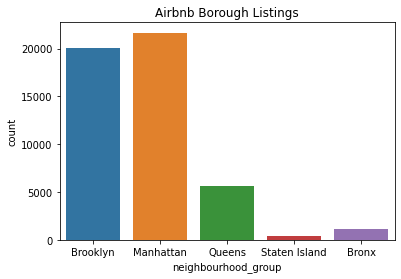

In [18]:
plt.figure()
sns.countplot(data = df_cat,x="neighbourhood_group")
plt.title("Airbnb Borough Listings")
plt.show()

In [19]:
df_cat.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

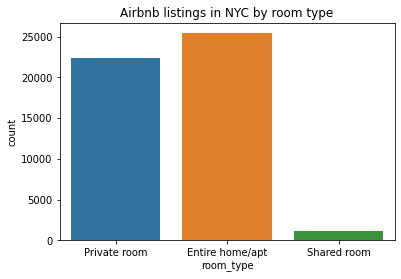

In [20]:
plt.figure()
sns.countplot(data=df_cat,x="room_type")
plt.title("Airbnb listings in NYC by room type")
plt.show()

In [21]:
# we observa that most of the rooms rented are entire home/apartment type followed by private type, and only a small number are shared.
# Let us compare these types by borough.

In [22]:
room_type_borough = df_cat.groupby(["neighbourhood_group", "room_type"])
room_type_borough.size()

neighbourhood_group  room_type      
Bronx                Entire home/apt      379
                     Private room         652
                     Shared room           60
Brooklyn             Entire home/apt     9559
                     Private room       10132
                     Shared room          413
Manhattan            Entire home/apt    13199
                     Private room        7982
                     Shared room          480
Queens               Entire home/apt     2096
                     Private room        3372
                     Shared room          198
Staten Island        Entire home/apt      176
                     Private room         188
                     Shared room            9
dtype: int64

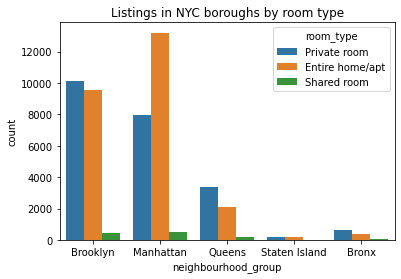

In [23]:
plt.figure()
sns.countplot(data=df_cat, x="neighbourhood_group",hue="room_type")
plt.title("Listings in NYC boroughs by room type")
plt.show()

In [24]:
# Numerical columns
df_num = df.select_dtypes(["int64","float64"])

In [25]:
df_num.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,0.00,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


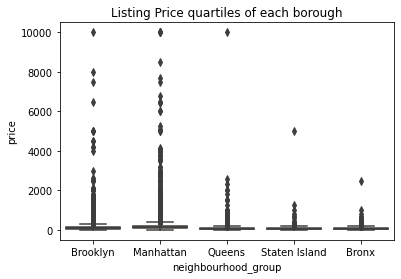

In [26]:
plt.figure()
sns.boxplot(data=df,x="neighbourhood_group",y="price")
plt.title("Listing Price quartiles of each borough")
plt.show()

In [27]:
df[df["price"] > 1000].count()

neighbourhood_group               239
neighbourhood                     239
latitude                          239
longitude                         239
room_type                         239
price                             239
minimum_nights                    239
number_of_reviews                 239
reviews_per_month                 239
calculated_host_listings_count    239
availability_365                  239
dtype: int64

In [28]:
# Removing outliers in prices.
# Remove all listings with a price greater than 1000USD. These values are outliers and skew the data.

In [29]:
df.drop(df[df["price"] > 1000].index, inplace=True)
df.count()

neighbourhood_group               48656
neighbourhood                     48656
latitude                          48656
longitude                         48656
room_type                         48656
price                             48656
minimum_nights                    48656
number_of_reviews                 48656
reviews_per_month                 48656
calculated_host_listings_count    48656
availability_365                  48656
dtype: int64

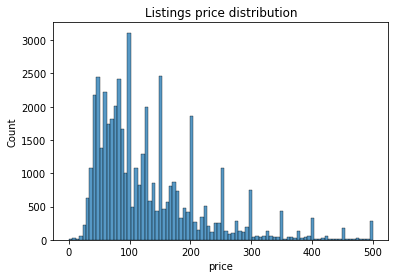

In [30]:
plt.figure()
sns.histplot(data=df[df["price"] <= 500], x="price")
plt.title("Listings price distribution")
plt.show()

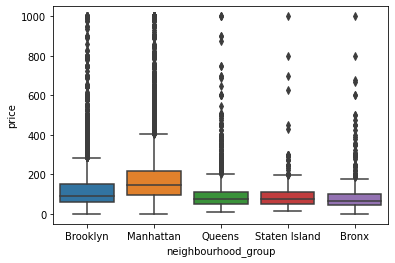

In [31]:
plt.figure()
sns.boxplot(data = df, x="neighbourhood_group", y="price")
plt.show()

In [32]:
borough_mean_prices = df.groupby("neighbourhood_group")["price"].mean().reset_index()
borough_mean_prices

,neighbourhood_group,price
0,Bronx,85.283486
1,Brooklyn,117.807930
2,Manhattan,178.936293
3,Queens,95.008310
4,Staten Island,98.584906


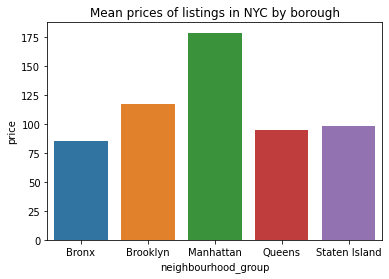

In [33]:
plt.figure()
sns.barplot(data=borough_mean_prices, x="neighbourhood_group", y="price")
plt.title("Mean prices of listings in NYC by borough")
plt.show()

In [34]:
price_by_room_type = df.groupby("room_type")["price"].mean().reset_index()
price_by_room_type

,room_type,price
0,Entire home/apt,194.596994
1,Private room,84.760637
2,Shared room,67.614853


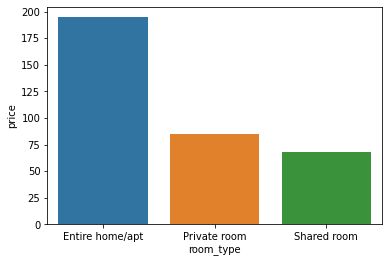

In [35]:
plt.figure()
sns.barplot(data=price_by_room_type, x="room_type", y="price")
plt.show()

In [36]:
df["minimum_nights"].describe()

count    48656.000000
mean         6.973549
std         20.265616
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [37]:
# We need to remove outliers from this data as there is no way a rental can have a minimum stay requirement of 1250 nights!

In [38]:
df[df["minimum_nights"] > 30]["minimum_nights"].count()

721

In [39]:
df.loc[df["minimum_nights"] > 30, "minimum_nights" ] = 30

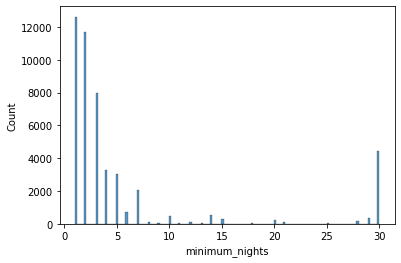

In [40]:
plt.figure()
sns.histplot(data=df,x="minimum_nights")
plt.show()

In [41]:
df["minimum_nights"].corr(df["price"])

0.04161193100217189

In [42]:
df["availability_365"].corr(df["price"])

0.11786966595469617

In [43]:
# We see that "minimum_nights" and "availability_365" have a somewhat positive correlation with "price"

In [44]:
# We are dropping the column "neighbourhood" for simplicity

In [45]:
df.drop(columns=["neighbourhood"], inplace=True)

In [46]:
from sklearn.preprocessing import LabelEncoder
for col in df_cat:
 le = LabelEncoder()
 df_cat[col] = le.fit_transform(df_cat[col])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [47]:
df_final = pd.concat([df_cat,df_num],axis=1)

In [48]:
df_final.head()

,neighbourhood_group,neighbourhood,room_type,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,108,1,40.64749,-73.97237,149,1,9,0.21,6,365
1,2,127,0,40.75362,-73.98377,225,1,45,0.38,2,355
2,2,94,1,40.80902,-73.94190,150,3,0,0.00,1,365
3,1,41,0,40.68514,-73.95976,89,1,270,4.64,1,194
4,2,61,0,40.79851,-73.94399,80,10,9,0.10,1,0


In [49]:
from scipy.stats import skew

skew =df_final["price"].skew()
skew

19.118938995046033

In [50]:
df_final["price"] = np.sqrt(df_final["price"])

In [51]:
sk=df_final["price"].skew()
sk

4.028002623382492

In [52]:
X = df_final.drop("price",axis=1)
y = df_final["price"]

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [54]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [56]:
model = Sequential()
model.add(Dense(8,input_shape=(X.shape[1],), activation="tanh"))
model.add(Dense(8,activation="tanh"))
model.add(Dense(1))

In [57]:
model.compile(loss="mse",optimizer="sgd")

In [58]:
history = model.fit(X_train_ss,y_train,epochs=30,batch_size=20)

Epoch 1/30
1712/1712 [==============================] - 2s 969us/step - loss: 20.5247
Epoch 2/30
1712/1712 [==============================] - 2s 984us/step - loss: 15.5415
Epoch 3/30
1712/1712 [==============================] - 2s 926us/step - loss: 14.4156
Epoch 4/30
1712/1712 [==============================] - 2s 956us/step - loss: 15.1735
Epoch 5/30
1712/1712 [==============================] - 2s 943us/step - loss: 15.3118
Epoch 6/30
1712/1712 [==============================] - 2s 939us/step - loss: 14.0417
Epoch 7/30
1712/1712 [==============================] - 2s 964us/step - loss: 13.1386
Epoch 8/30
1712/1712 [==============================] - 2s 965us/step - loss: 16.2641
Epoch 9/30
1712/1712 [==============================] - 2s 981us/step - loss: 13.9183
Epoch 10/30
1712/1712 [==============================] - 2s 924us/step - loss: 14.1734
Epoch 11/30
1712/1712 [==============================] - 2s 942us/step - loss: 13.4675
Epoch 12/30
1712/1712 [=============================

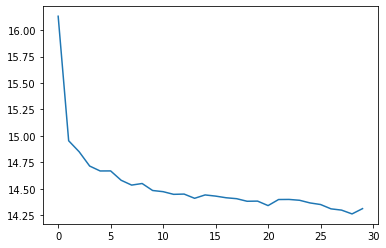

In [59]:
plt.plot(history.history["loss"])

In [60]:
y_pred = model.predict(X_test_ss)

In [61]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

14.908600361076648